In [13]:
# import main lib for machine learning

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os

**Import the data from the excel file**

In [14]:
# read the data source
df = pd.read_excel('dataset1.xlsx')

In [15]:
# display sample of 5 for exploring the data
df.sample(5)

,target,var1,var2,var3,var4,var5,var6,var7
733,1,271.34,659.567,Brazil,NaN,253.00,yes,2019-01-15 22:49:45
915,1,281.28,521.822,Spain,NaN,317.25,no,2019-03-09 03:41:30
101,1,224.38,602.235,Martinique,126.0,309.40,no,2019-07-23 11:46:28
901,0,494.10,651.810,Burkina Faso,NaN,371.35,no,2019-01-31 09:57:34
819,1,402.30,286.799,Germany,NaN,410.60,no,2019-02-03 10:40:27


In [16]:
# define the distinct values for target column to detech how many classes 
target = df['target']
target_counts = target.value_counts()
print(target_counts)

target
0    466
1    459
Name: count, dtype: int64


In [17]:
df['var6'].value_counts()

var6
yes    483
no     442
Name: count, dtype: int64

Get describtion of the data set

# Discover the dataset

In [18]:
# get the describe of the data
df.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


In [19]:
# Discover the information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  925 non-null    int64  
 1   var1    925 non-null    float64
 2   var2    925 non-null    float64
 3   var3    925 non-null    object 
 4   var4    325 non-null    float64
 5   var5    925 non-null    float64
 6   var6    925 non-null    object 
 7   var7    925 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 57.9+ KB


the **var 4** contains 925-325 =600 record as nulls

# Data Preprocessing

the var3 and var7 could be drop as there are none important feature and of them
is country and other is date


In [20]:
# drop var3 and var7, both are not important to the model
df.drop(columns=['var3', 'var7'],inplace=True)

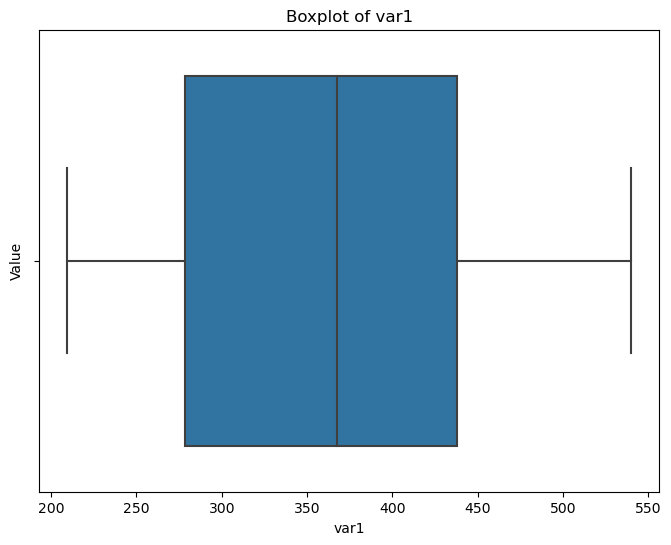

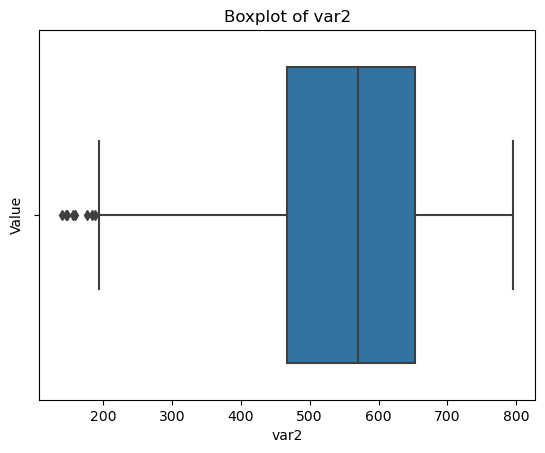

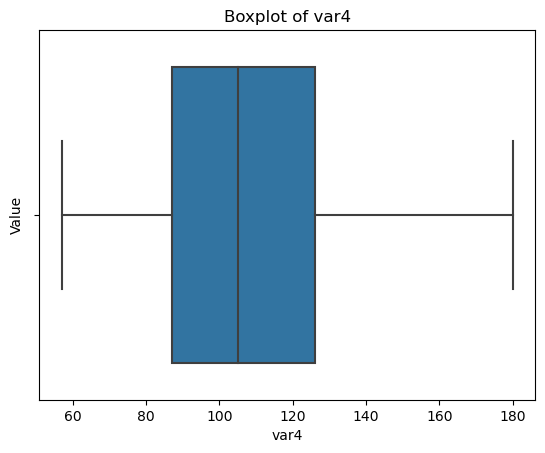

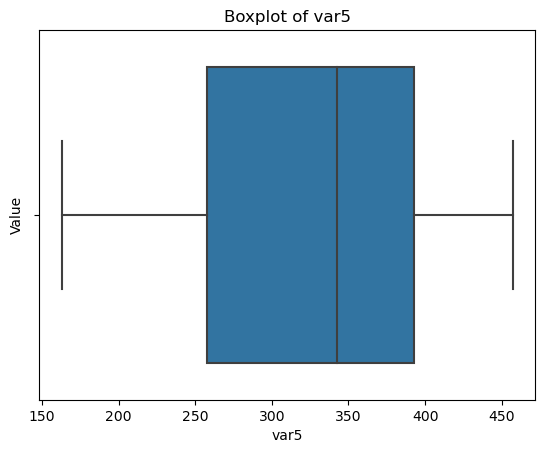

In [21]:
#  draw boxplot for all column that are numbers to detect the outliers exclude the target

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col != 'target']
plt.figure(figsize=(8, 6))

for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.title(f'Boxplot of {col}')
    plt.show()


Discover the values of var4

[138.  81.  90. 102. 105. 111.  78. 129. 147.  69.  87. 114.  75. 132.
  93.  99. 108. 126. 135.  63. 159. 117.  96. 162. 174.  84. 123. 156.
 150.  66. 168. 171. 141.  72. 153.  60. 177.  57. 120. 144. 180.  nan]
var4
87.0     19
114.0    17
93.0     17
96.0     15
117.0    15
99.0     14
105.0    13
135.0    13
132.0    13
102.0    12
90.0     12
75.0     11
84.0     11
123.0    10
126.0    10
81.0     10
111.0    10
78.0      9
129.0     9
120.0     8
108.0     8
156.0     7
138.0     7
72.0      7
69.0      6
147.0     5
162.0     4
63.0      4
153.0     4
144.0     3
60.0      3
159.0     3
150.0     3
174.0     3
141.0     2
66.0      2
57.0      2
171.0     1
168.0     1
177.0     1
180.0     1
Name: count, dtype: int64


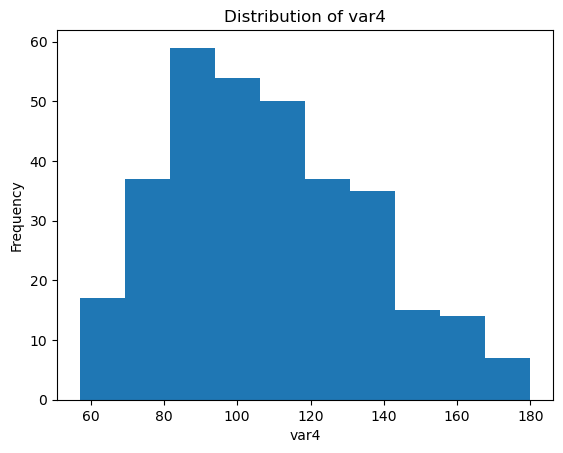

In [22]:
#discover the pattern of var4 how the values look like

# Check the unique values in var4
unique_values = df['var4'].unique()
print(unique_values)

# Check the frequency of each unique value
value_counts = df['var4'].value_counts()
print(value_counts)

# Plot the distribution of var4
plt.hist(df['var4'], bins=10)
plt.xlabel('var4')
plt.ylabel('Frequency')
plt.title('Distribution of var4')
plt.show()


if possible to choose the mean of the the missing var4

In [23]:
#generate boxplot for var 4

old_var4= df['var4']

# Try different solution to overcome the issue of missing values

In [24]:
import random
#from sklearn.experimental import enable_iterative_imputer  # noqa
#from sklearn.impute import IterativeImputer
#from sklearn.impute import KNNImputer

#choose the mean of the the missing var4

#mean_value = df['var4'].mean()
#df['var4'] = df['var4'].fillna(mean_value)


#df['var4'].interpolate(method='linear', inplace=True)

#get random value


for index, row in df.iterrows():
  if np.isnan(row['var4']):
      random_sample = old_var4.iloc[random.randrange(len(df['var4'].dropna()))]  # randomly selects a value from original subset.
      df.loc[index, 'var4'] = random_sample  # replaces the nan value with the random sample.

#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=5)
#df['var4'] = imputer.fit_transform(df[['var4']])

#from sklearn.experimental import enable_iterative_imputer  # noqa
#from sklearn.impute import IterativeImputer

#imputer = IterativeImputer(max_iter=10, random_state=0)
#df['var4'] = imputer.fit_transform(df[['var4']])


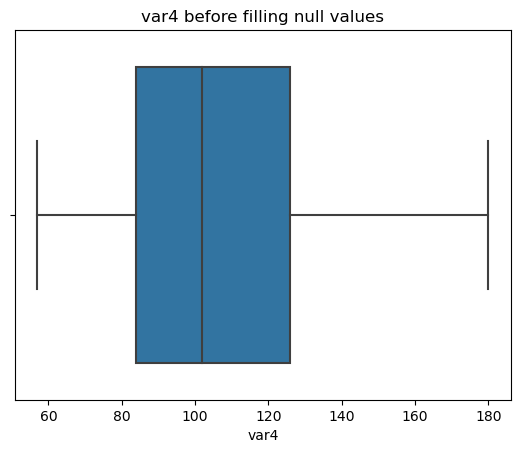

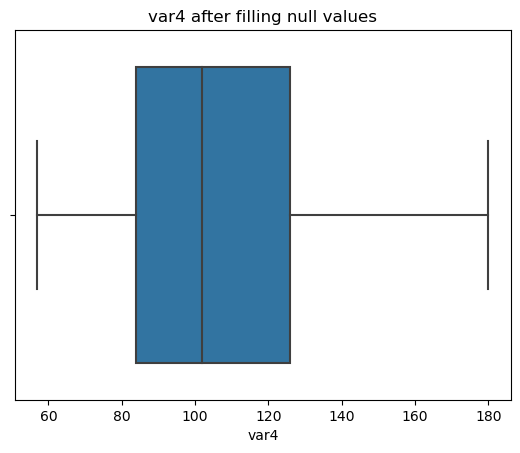

In [25]:
#generate boxplot for var 4

sns.boxplot(x=old_var4)
plt.title('var4 before filling null values')
plt.show()

sns.boxplot(x=df['var4'])
plt.title('var4 after filling null values')
plt.show()

## Encode the category columns

In [26]:
print(df.columns)

# One-Hot Encoded for var3
encoded_df = pd.get_dummies(df, columns=['var6'], drop_first=False)
#print(encoded_df.columns)

updated_df = pd.concat([df, encoded_df], axis=1)


Index(['target', 'var1', 'var2', 'var4', 'var5', 'var6'], dtype='object')


In [27]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var6_no,var6_yes
875,1,439.38,669.290,132.0,252.60,False,True
882,1,282.44,662.815,156.0,229.80,False,True
360,1,298.40,396.160,129.0,263.40,True,False
26,1,299.58,467.373,102.0,183.65,True,False
869,1,289.42,608.128,117.0,208.65,False,True


In [28]:
#convert the new column from bool to int
encoded_df['var6_no'] = encoded_df['var6_no'].astype(int)
encoded_df['var6_yes'] = encoded_df['var6_yes'].astype(int)


In [29]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var6_no,var6_yes
718,0,350.34,672.403,60.0,374.40,1,0
656,1,254.40,239.426,66.0,337.55,0,1
271,1,265.42,528.020,150.0,224.80,1,0
97,1,274.48,633.630,135.0,223.90,1,0
287,0,435.70,651.722,84.0,384.05,1,0


In [30]:
#  get columns types of updated_df

encoded_df.dtypes


target        int64
var1        float64
var2        float64
var4        float64
var5        float64
var6_no       int64
var6_yes      int64
dtype: object

## Rescaling  for the Features

In [31]:
# rescalling the column to be align the same scaller

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for col in numeric_columns:
  encoded_df[col] = scaler.fit_transform(encoded_df[[col]])


In [32]:
encoded_df.sample(5)

,target,var1,var2,var4,var5,var6_no,var6_yes
23,0,0.478690,0.928169,0.292683,0.636410,1,0
443,1,0.379223,0.864220,0.609756,0.191059,0,1
502,1,0.278847,0.153212,0.609756,0.806221,0,1
52,0,0.726722,0.851477,0.268293,0.655108,0,1
922,1,0.168120,0.608055,0.634146,0.154173,0,1


In [33]:
# get corrlation between feature
encoded_df.corr()


,target,var1,var2,var4,var5,var6_no,var6_yes
target,1.000000,-0.784098,-0.495492,0.161954,-0.747803,-0.044705,0.044705
var1,-0.784098,1.000000,0.344854,-0.105535,0.519466,0.038392,-0.038392
var2,-0.495492,0.344854,1.000000,-0.045919,0.328229,0.003327,-0.003327
var4,0.161954,-0.105535,-0.045919,1.000000,-0.124862,0.008049,-0.008049
var5,-0.747803,0.519466,0.328229,-0.124862,1.000000,-0.017954,0.017954
var6_no,-0.044705,0.038392,0.003327,0.008049,-0.017954,1.000000,-1.000000
var6_yes,0.044705,-0.038392,-0.003327,-0.008049,0.017954,-1.000000,1.000000


In [34]:
# count how many yes and no in the target

encoded_df['target'].value_counts()


target
0    466
1    459
Name: count, dtype: int64

`the data is near to be balance so no need to do a kind of oversampling or undersampling`

## Splitting the data into training and testing sets

In [35]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = encoded_df.drop('target', axis=1)
y = encoded_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (647, 6)
Shape of X_test: (278, 6)
Shape of y_train: (647,)
Shape of y_test: (278,)


In [36]:
X_train.sample(5)

,var1,var2,var4,var5,var6_no,var6_yes
580,0.303850,0.960436,0.609756,0.481727,0,1
283,0.249304,0.264885,0.463415,0.123236,0,1
543,0.471425,0.579096,0.000000,0.998980,1,0
510,0.272551,0.864064,0.658537,0.248683,1,0
588,0.151955,0.308370,0.560976,0.305966,1,0


# Training the model

In [37]:
# generate model using decesion tree and use grid search for find the optimal value then use it to train the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score # Import the accuracy_score function


# Define the parameter grid
param_grid = {
    'max_depth': np.arange(1, 5),
    'min_samples_split': [2,3,4, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(dt_classifier, param_grid)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Train the decision tree classifier with the best hyperparameters
dt_classifier_best = DecisionTreeClassifier(**best_params)
dt_classifier_best.fit(X_train, y_train)

# Evaluate the decision tree classifier on the test data
y_pred_dt = dt_classifier_best.predict(X_test)

# Calculate the accuracy of the decision tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Print the accuracy of the decision tree classifier
print("Accuracy of the decision tree classifier:", accuracy_dt)


Best hyperparameters: {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}
Accuracy of the decision tree classifier: 0.960431654676259


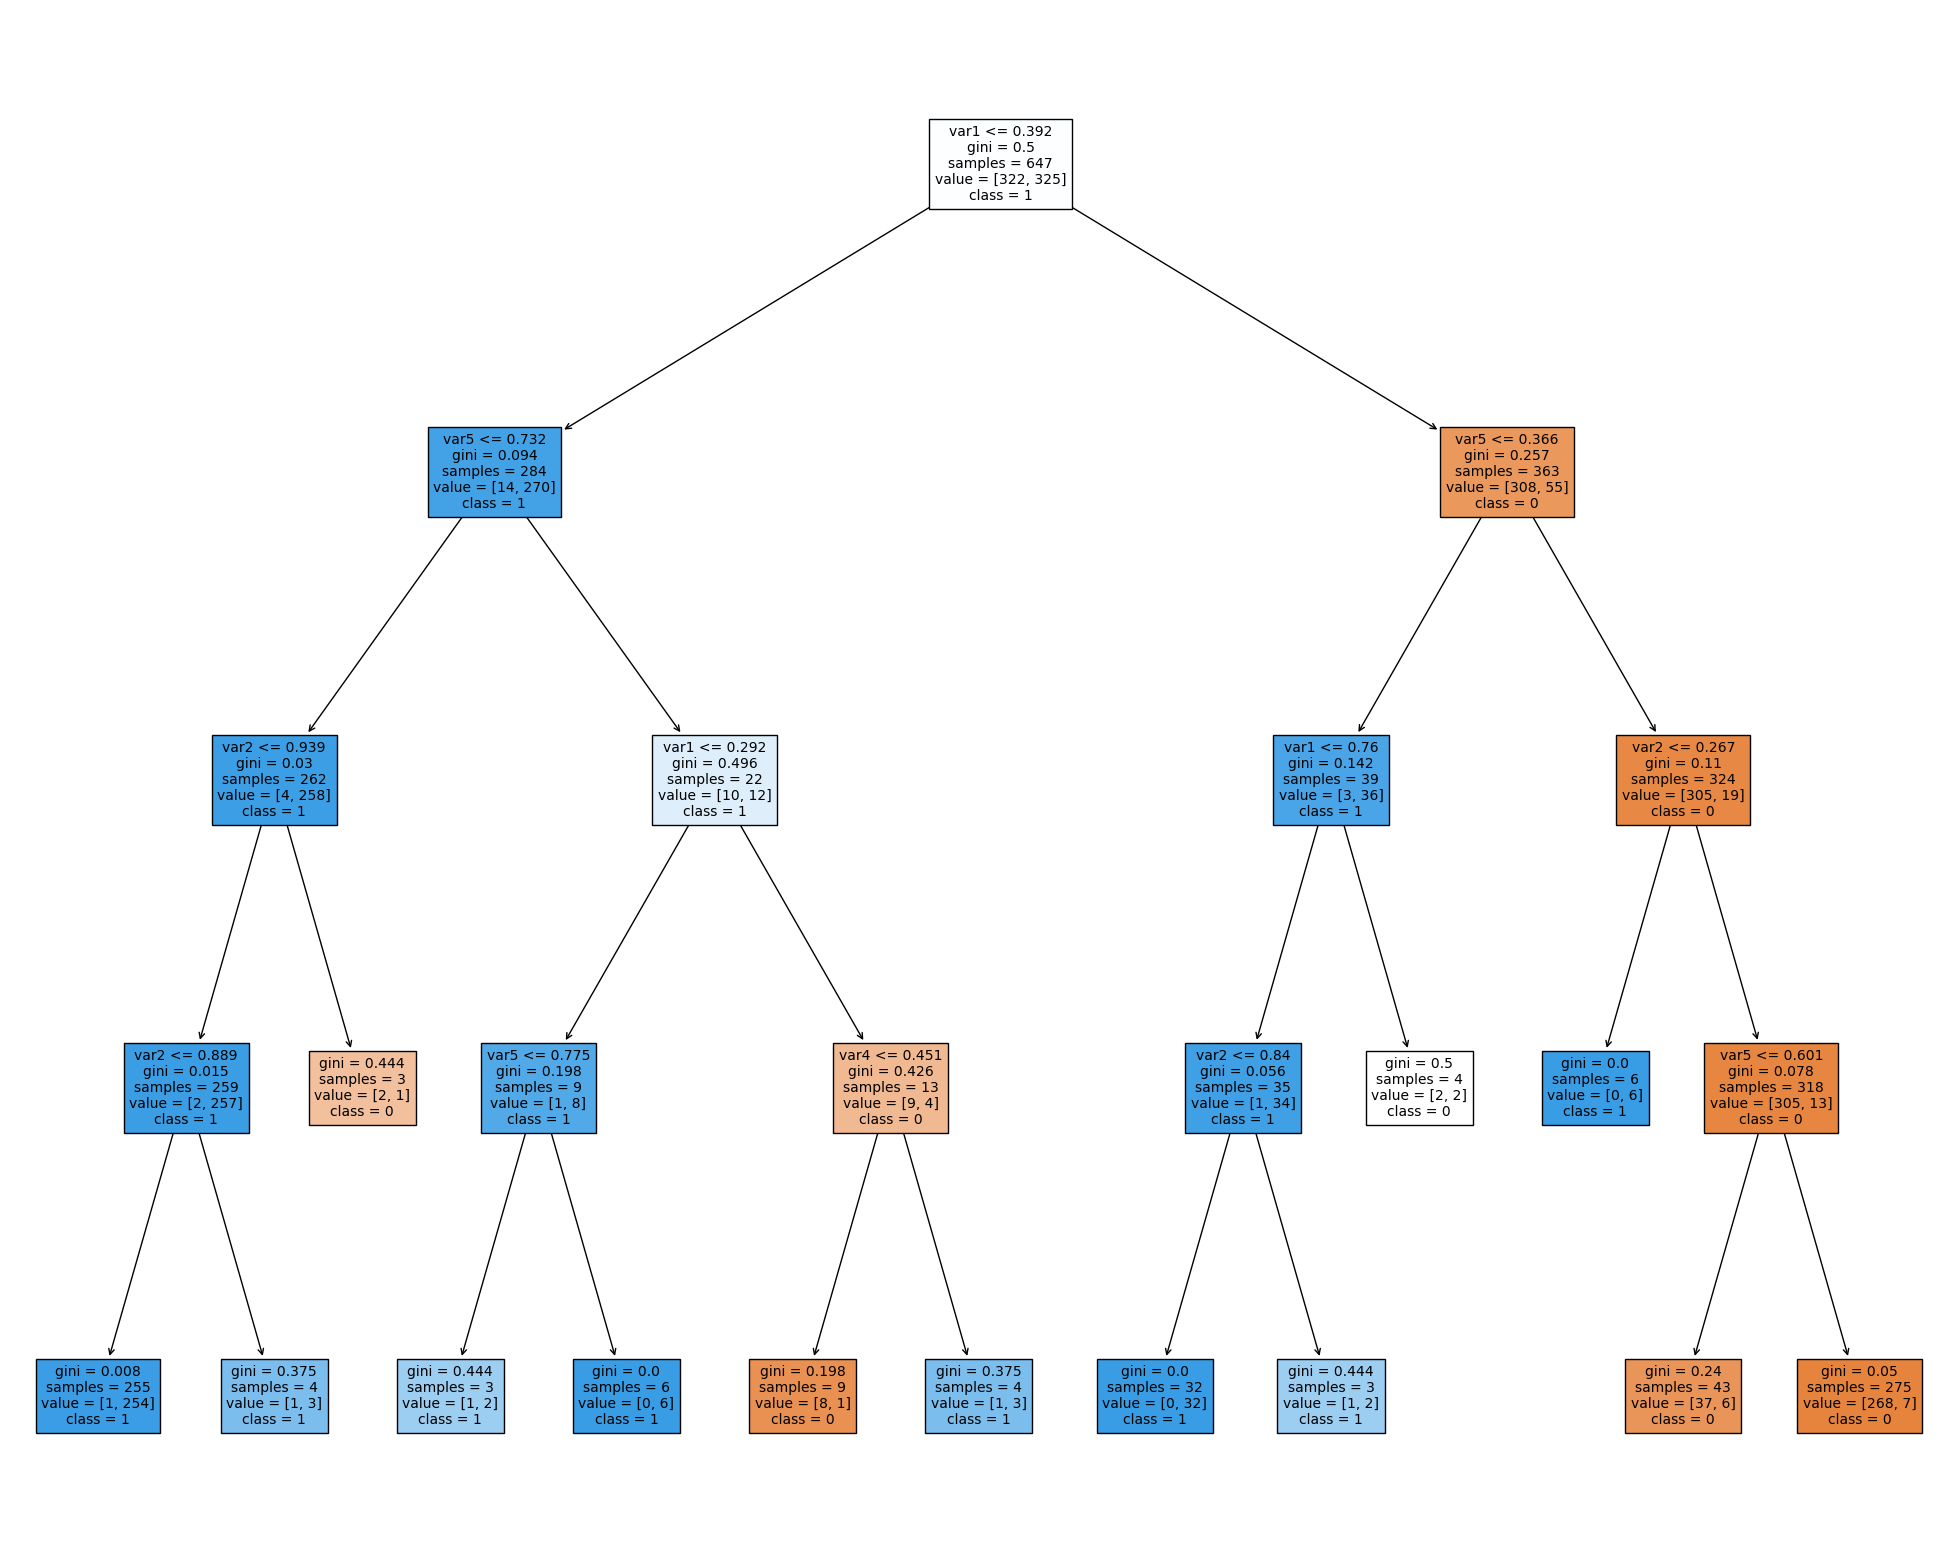

In [38]:
# draw the decesion tree

from sklearn import tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))
tree.plot_tree(dt_classifier_best, feature_names=list(X.columns), class_names=['0', '1'], fontsize=10, filled=True)
plt.show()


## Confusion matrix for Decesion tree 

In [39]:
# print the confusion matrix in readably way

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Print the DataFrame
print(cm_df.to_string())


          Predicted 0  Predicted 1
Actual 0          141            3
Actual 1            8          126


`confusion matrix is looks good and match with the accuracy result`

In [43]:
### Cross Validation for decesion Tree

from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(dt_classifier_best, X, y, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())


Cross Validation Scores:  [0.97297297 0.96756757 0.95675676 0.93513514 0.91891892]
Average CV Score:  0.9502702702702704


## Random Forst
using different technique for double checking

In [40]:
# generate model using random forst and use grid search for find the optimal value then use it to train the mode

from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 15,20,30],
    'max_depth': [2,3,4,5,6,7],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5, 10, 20],
    'min_samples_leaf': [ 2, 4, 6, 8]
}

# Create the random forest classifier
rf_classifier = RandomForestClassifier()

# Instantiate the grid search object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best hyperparameters:", best_params)

# Train the random forest classifier with the best hyperparameters
rf_classifier_best = RandomForestClassifier(**best_params)
rf_classifier_best.fit(X_train, y_train)

# Evaluate the random forest classifier on the test data
y_pred_rf = rf_classifier_best.predict(X_test)

# Calculate the accuracy of the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Print the accuracy of the random forest classifier
print("Accuracy of the random forest classifier:", accuracy_rf)



Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 15}
Accuracy of the random forest classifier: 0.9568345323741008


### Confusion Matrix

In [41]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Print the DataFrame
print(cm_df.to_string())

          Predicted 0  Predicted 1
Actual 0          139            5
Actual 1            7          127


### Cross Validation for Random Forst 

In [42]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(rf_classifier_best, X, y, cv=k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.96756757 0.95135135 0.95135135 0.96216216 0.92432432]
Average CV Score:  0.9513513513513514
